# 네이버 검색 결과 가져오기

> 웹크롤링 데이터
* 블로그 제목
* 블로그 링크
* 등록일자
* 블로그 내용

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from bs4 import BeautifulSoup
from urllib.request import urlopen

## 1. 네이버 홈페이지 접근 및 검색어 입력

####  
### 1) Selenium을 이용해 네이버에 접근

In [2]:
from selenium import webdriver


web_crawling = webdriver.Chrome("./chromedriver")

web_crawling.get('https://www.naver.com/')

### 2) 검색어 입력

#### 검색어 입력에 대한 해당하는 곳을 찾는다 .(find_element_by_name)
#### 찾은 후 미리 정의해 놓은 'search_word' 변수를 이용해 검색어를 입력한다.

In [3]:
search_word = '빅데이터'
web_crawling.find_element_by_name('query').send_keys(search_word)

#### css_selector를 사용해 찾을 수도 있다.(마우스 우클릭 -> copy -> copy selector)  : #query

In [3]:
search_word = '빅데이터'
web_crawling.find_element_by_css_selector('#query').send_keys(search_word)

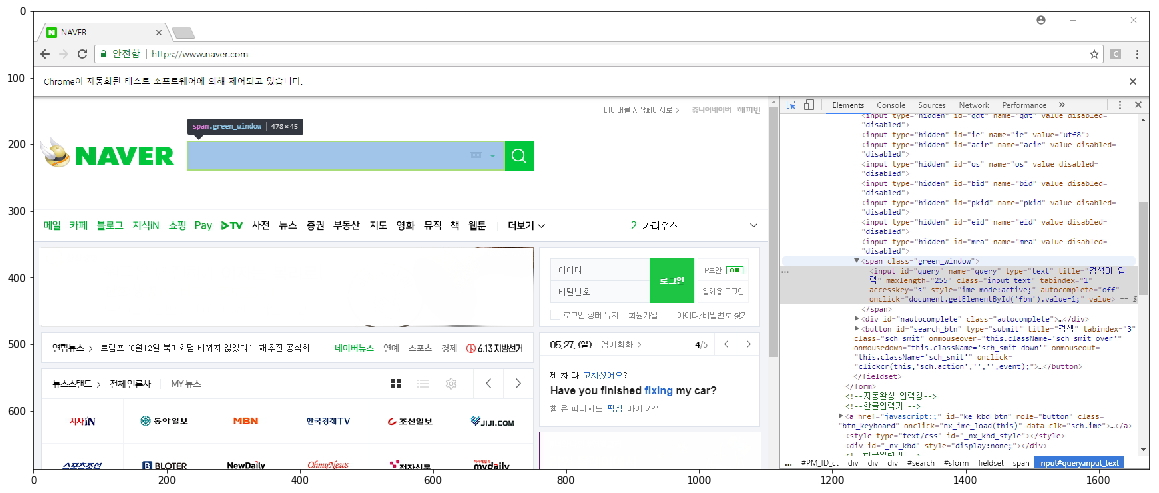

In [4]:
img = imread('search1.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

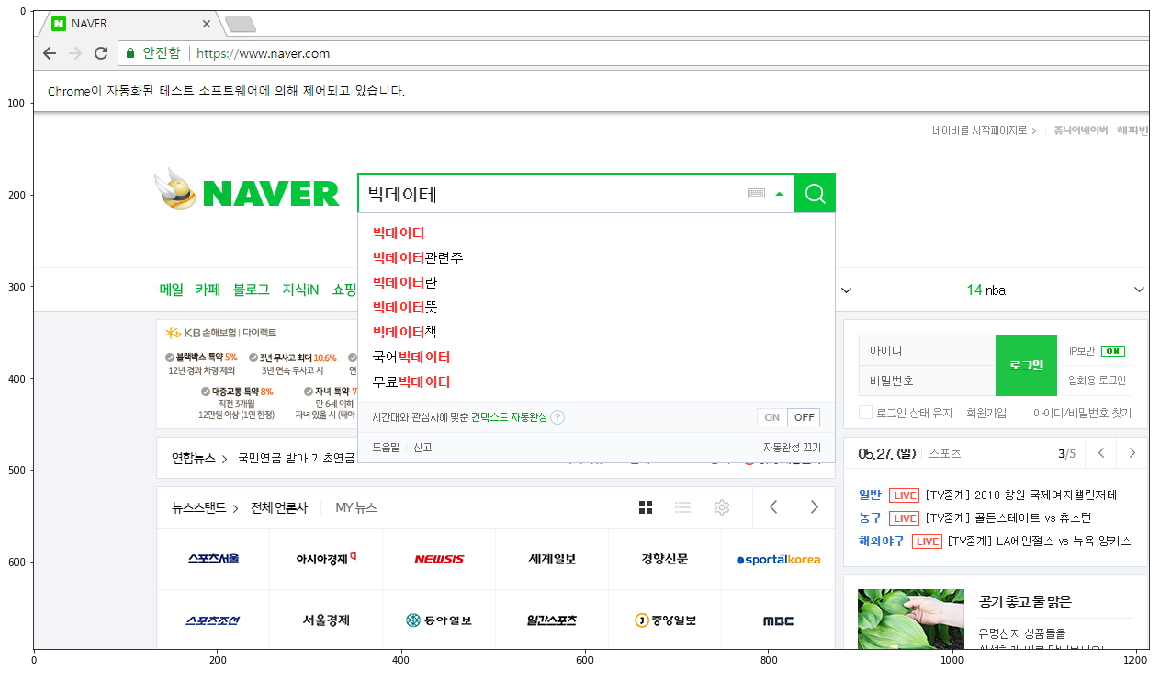

In [5]:
img = imread('search3.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

####   
###  3) 검색 버튼 눌러서 검색

#### 검색어 버튼에 해당하는 부분을 찾느다.(find_element_by_id)
#### 검색버튼을 누른다.(submit)

In [4]:
auto_search = web_crawling.find_element_by_id('search_btn')
auto_search.submit()

#### 이 부분도 css_selector를 찾아도 된다. :  #search_btn 
#### 검색버튼은 click으로도 가능하다.

In [4]:
auto_search = web_crawling.find_element_by_css_selector('#search_btn').click()

### 4) 검색 결과 중 블로그만 보기

#### '블로그' 탭 누르기

In [5]:
all_tab = web_crawling.find_element_by_id('lnb')
blog = all_tab.find_element_by_class_name('lnb3') 
blog.click()

#### 아래 css_selector로도 가능. 최소 'li.lnb3'까지는 가주어야 블로그 탭을 누를 수 있다. 

In [8]:
web_crawling.find_element_by_css_selector('#lnb > div > div.lnb_menu > ul > li.lnb3 > a > span').click()

In [5]:
web_crawling.find_element_by_css_selector('#lnb > div > div.lnb_menu > ul > li.lnb3 > a').click()

In [5]:
web_crawling.find_element_by_css_selector('#lnb > div > div.lnb_menu > ul > li.lnb3').click()

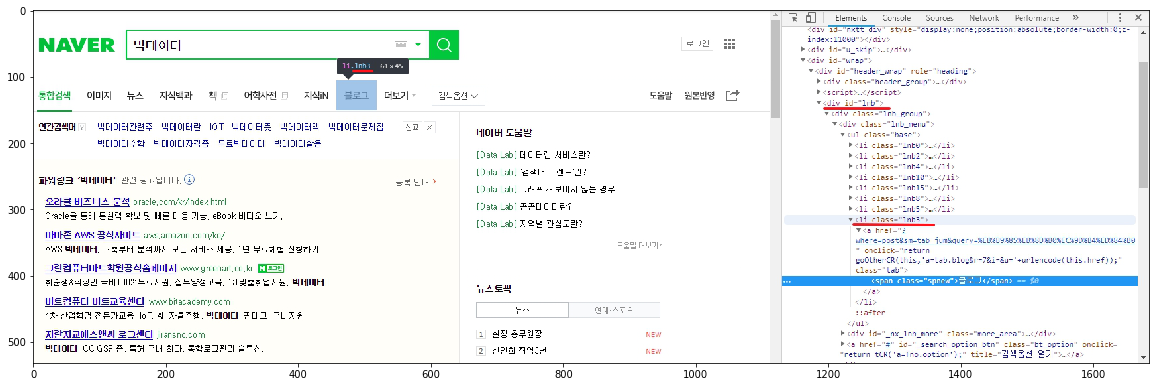

In [7]:
img = imread('search4.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

### 5) 정보 가져오기 
* 블로그 제목
* 블로그 링크
* 등록일자
* 블로그 내용

#### 웹페이지 소스를 가져온다. html로 파싱

In [6]:
html = web_crawling.page_source 

In [7]:
html[:1000]

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/69.0.3497.100 safari/537.36" data-platform="win32"><head> <meta charset="utf-8" /> <meta name="referrer" content="always" />  <meta name="format-detection" content="telephone=no,address=no,email=no" /> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0" /> <meta property="og:title" content="빅데이터 : 네이버 블로그검색" /> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" /> <meta property="og:description" content="\'빅데이터\'의 네이버 블로그검색 결과입니다." /> <meta name="description" lang="ko" content="\'빅데이터\'의 네이버 블로그검색 결과입니다." /> <title>빅데이터 : 네이버 블로그검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico" />  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/

In [8]:
soup = BeautifulSoup(html, 'html.parser')  

In [9]:
type(soup)

bs4.BeautifulSoup

####   
#### 블로그 제목

In [10]:
blog_titles = soup.select('.sh_blog_title')

In [11]:
for n in blog_titles:            
    print(n.text)

빅데이터전문가 전략적 준비법!
책 추천 : 모두 거짓말을 한다 (구글 빅데이터로 밝혀낸 인간의...
호텔앤레스토랑 - 빅데이터는 호텔 산업을 바꿀 수 있을까?...
빅데이터전문가 이렇게 준비해요!
빅데이터전문가 나도 할테야
<빅데이터뉴스>세계 4위 섬많은 나라 여행-한국
펌 / 빅데이터로 범죄 예측… 현실이 된 '마이너리티 리포트'
[여행 빅데이터] 추석 여행 가장 인기 있는 곳은 어디?
빅데이터 기술의 숨은 조력자, 텍스트 마이닝
빅데이터 4차산업의 선두 더조은컴퓨터아카데미


#### 블로그 링크

In [12]:
blog_link = soup.select('dl > dd.txt_block > span > a.url')

In [13]:
for n in blog_link:            
    print(n.text)

abeck123.blog.me/221368120554
blog.naver.com/mbastudy/221367633324
blog.naver.com/hotel...
blog.naver.com/lawkapp/221361436060
pinkrozz1.blog.me/22...
leeconan.com/221366089639
krbg2002.blog.me/221369684174
blog.naver.com/the_t...
blog.naver.com/mocie...
taiji15.blog.me/221349058900


#### 등록일자

In [14]:
blog_date = soup.select('.txt_inline')

In [15]:
for n in blog_date:            
    print(n.text)

2018.09.30. 
2018.09.29. 
2018.09.21. 
2018.09.18. 
2018.09.11. 
2018.09.27. 
6일 전 
2018.09.12. 
2018.09.18. 
2018.08.30. 


#### 블로그 내용

In [16]:
blog_text = soup.select('.sh_blog_passage')

In [17]:
for n in blog_text:            
    print(n.text)
    print("")

빅데이터전문가 전략적 준비법! "이미 너무 많은 정보가 흘러넘치고 있다" 원하는... 바로 빅데이터전문가 인데요! 해당 전문직은 온라인상에 있는 다양한 정보를 수집해...

책에는 빅데이터로 할 수 있는 것과 할 수 없는 것, 앞으로의 전망과 빅데이터 과학자로 일해 온 저자의 생각이 각종 통계와 데이터 분석을 통해 설득력있게 제시된다....

4차 산업혁명의 물결로 우리 앞에 찾아온 빅데이터. 호텔 및 데이터 전문가들은 몇 년 째 불황에서 벗어나지 못한 호텔 산업의 탈출구로 빅데이터를 제시하고 있다....

빅데이터전문가는 많은 양의 데이터를 사람들의 행동 패턴이나 시장의 경제 상황 등을 예측하여 함축된 데이터를 도출하고 새로운 부가가치를 창출하는 전문인이라고...

해당 빅데이터 과정에서 어떤걸 주로 배우나 싶었는데 데이터 마이닝 프로세스를 기준으로 분석에 사용한 최종 데이터마트생성 데이터 조작처리 및 추출, 조인 수업과...

빅데이터가 4차산업의 힘이라고 한다. 데이터가 많아지고 그와 함게 그 데이터를 잘 분석해서 한눈에 이해되게 하는 것이 <빅데이터의 진정한 가치>이다. 육지와...

제품 생산 과정에서도 빅데이터가 활용되고 있다. 포스코 ICT는 생산현장의 데이터를 수집해 모니터링하고, 사물의 위치 및 온도 등의 정보를 토대로 돌발 고장을...

[여행 빅데이터] 추석 여행 가장 인기 있는 곳은 어디? 안녕하세요. 여플(여행... 여행객의 데이터를 종합 분석해 발표했습니다. 지난 3년간 가장 큰 폭으로 성장한 추석...

때문에 ‘4차 산업혁명은 빅데이터 혁명이다’ 라는 말도 나오고 있죠. 그만큼 데이터의 중요성이 높아지고 있다는 의미입니다. 그런데 데이터가 방대해지다보니...

있는 "빅데이터" 이 분야는 과거에 마이너리티 리포트라는 영화에서 등장하여 엄청나게 큰 기존의 데이터들을 분석해서 미래에 생길 가능성이 높은 범죄를 예방하고...



####   

#### 링크의 경우 text로 가져오기 한계가 있음. 다른 방식을 사용해야함.

####     
#### 다시 웹페이지를 가져온다. 이번엔 lxml로 파싱한다.

In [18]:
html = web_crawling.page_source 

In [19]:
html[:500]

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/69.0.3497.100 safari/537.36" data-platform="win32"><head> <meta charset="utf-8" /> <meta name="referrer" content="always" />  <meta name="format-detection" content="telephone=no,address=no,email=no" /> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0" /> <meta property="og:title" content="빅'

In [20]:
soup = BeautifulSoup(html, 'lxml')

In [21]:
type(soup)

bs4.BeautifulSoup

#### 블로그 섹션의 ul id와 class 이름을 찾는다.

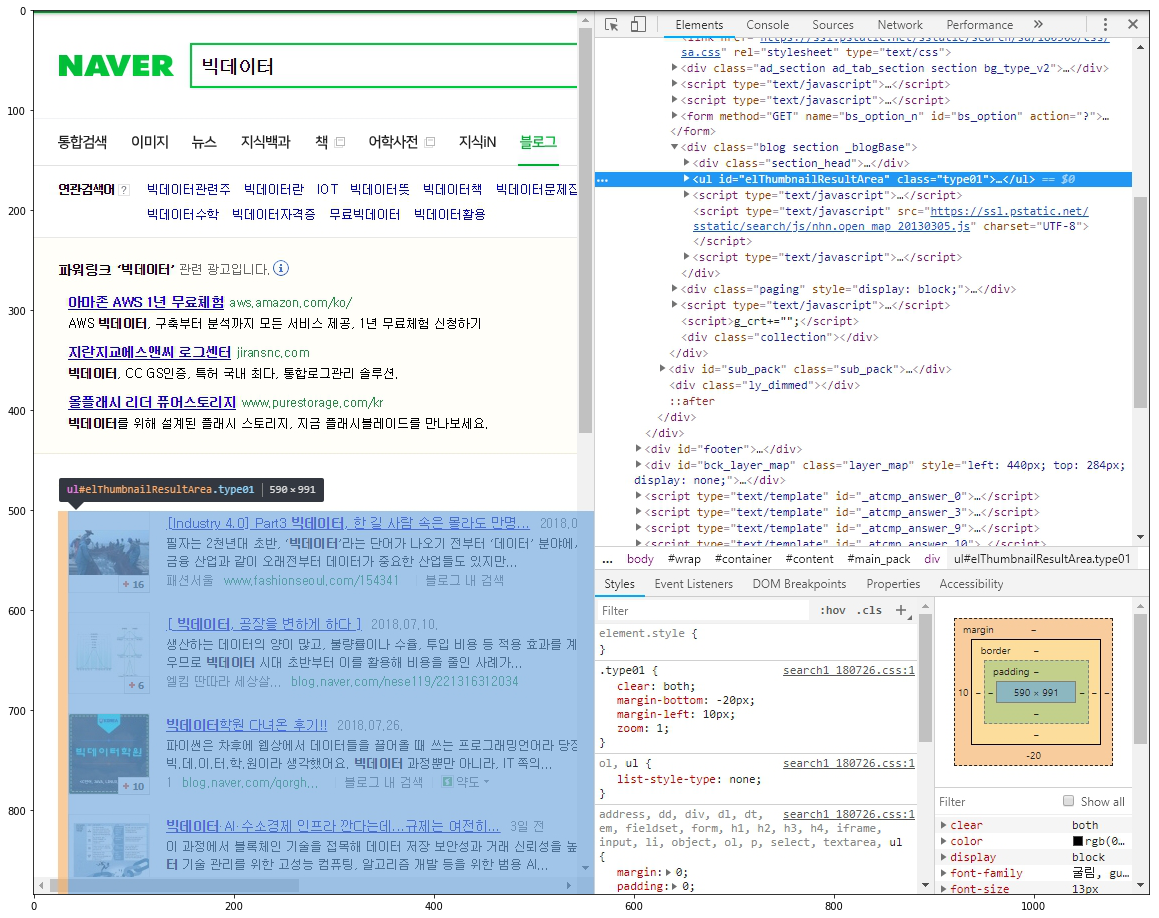

In [10]:
img = imread('search5.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

In [22]:
tmp = soup.find('ul', 'type01')

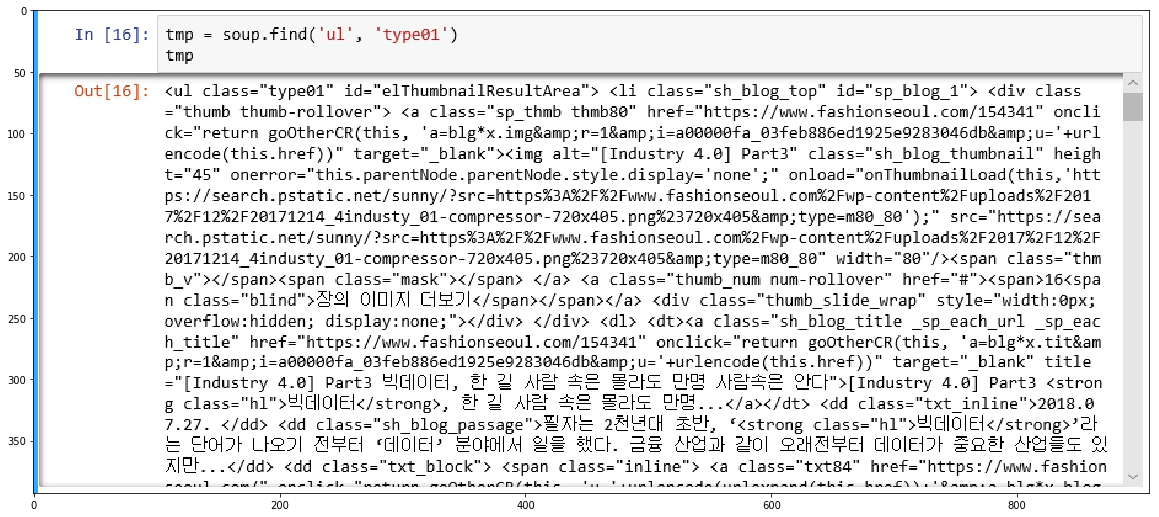

In [18]:
img = imread('result1.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

In [23]:
tmp = soup.find('ul', {'id':'elThumbnailResultArea'})

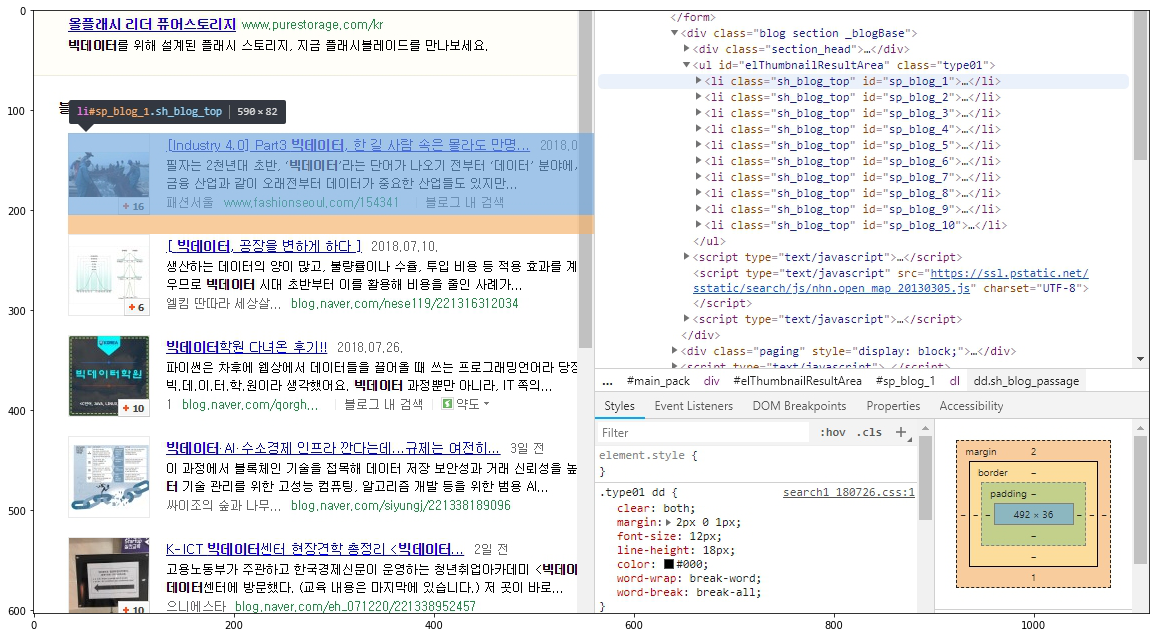

In [40]:
img = imread('result2.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

#### 블로그 결과가 'li'로 시작하는 class와 id로 정렬되어 있음. 1페이지에는 총 10개의 결과가 존재

In [24]:
tmp2 = tmp.find_all('li')
len(tmp2)

10

In [25]:
li_tag = tmp2[0]
li_tag

<li class="sh_blog_top" id="sp_blog_1"> <div class="thumb thumb-rollover"> <a class="sp_thmb thmb80" href="https://abeck123.blog.me/221368120554" onclick="return goOtherCR(this, 'a=blg*i.img&amp;r=1&amp;i=90000003_00000000000000338A9174EA&amp;u='+urlencode(this.href))" target="_blank"><img alt="빅데이터전문가 전략적" class="sh_blog_thumbnail" height="80" onerror="this.parentNode.parentNode.style.display='none';" onload="onThumbnailLoad(this,'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxODA5MzBfMTAz%2FMDAxNTM4Mjc4NjY2MDg5.jlRAsnhajRlRQJMH-G7Im14ZBeSOGirqtn96EyoLKtQg.jakisOvNRlbOC5EKfbtN-KofJLhiRdkmTKWZNPpI43sg.JPEG.abeck123%2F%25BA%25F2%25B5%25A5%25C0%25CC%25C5%25CD_%25C0%25DA%25B0%25DD%25C1%25F5_03.jpg%23716x949&amp;type=m80_80');" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxODA5MzBfMTAz%2FMDAxNTM4Mjc4NjY2MDg5.jlRAsnhajRlRQJMH-G7Im14ZBeSOGirqtn96EyoLKtQg.jakisOvNRlbOC5EKfbtN-KofJLhiRdkmTKWZNPpI43sg.JPEG.abeck123%2F%25BA%25F2

In [26]:
type(li_tag)

bs4.element.Tag

#### 정보를 저장할 변수를 설정한다.

In [27]:
blog_title = '' 
blog_link  = '' 
blog_date  = '' 
blog_text  = ''  

####   
#### 블로그 제목

#### 제목 부분 css selector : '#sp_blog_1 > dl > dt > a'

In [28]:
blog_title = li_tag.find('dt').get_text()
blog_title

'빅데이터전문가 전략적 준비법!'

#### 텍스트 가져오는 함수들

In [29]:
b_title = li_tag.find('dt').text
b_title = li_tag.find('dt').get_text()
b_title = li_tag.find('dt').getText()

  #### 블로그 링크

In [30]:
blog_link = li_tag.find('a')['href']
blog_link

'https://abeck123.blog.me/221368120554'

#### 등록일자

In [31]:
blog_date = li_tag.find('dd', 'txt_inline').get_text()
blog_date

'2018.09.30. '

In [32]:
# 빈 공간 정리

blog_date = blog_date.rstrip()
blog_date

'2018.09.30.'

 #### 블로그 내용

In [33]:
blog_text = li_tag.find('dd', 'sh_blog_passage')
blog_text = blog_text.get_text()
blog_text

'빅데이터전문가 전략적 준비법! "이미 너무 많은 정보가 흘러넘치고 있다" 원하는... 바로 빅데이터전문가 인데요! 해당 전문직은 온라인상에 있는 다양한 정보를 수집해...'

####   

#### 블로그 리스트 정보 가져오기

In [34]:
blog_title = []  # 블로그 제목
blog_link  = []  # 블로그 링크
blog_date  = []  # 등록일자
blog_text  = []  # 블로그 내용

In [35]:
tmp2 = tmp.find_all('li')

for idx in range(len(tmp2)):
    # print('idx:', idx)
    li_tag = tmp2[idx]

    b_title = li_tag.find('dt').get_text()
    b_link = li_tag.find('a')['href']
    b_date = li_tag.find('dd', 'txt_inline').get_text()
    b_text = li_tag.find('dd', 'sh_blog_passage')
    b_text = b_text.get_text()
    
    blog_title.append(b_title)
    blog_link.append(b_link)
    blog_date.append(b_date)
    blog_text.append(b_text)
    
    print('check lile:', idx+1)

check lile: 1
check lile: 2
check lile: 3
check lile: 4
check lile: 5
check lile: 6
check lile: 7
check lile: 8
check lile: 9
check lile: 10


In [36]:
blog_title

['빅데이터전문가 전략적 준비법!',
 '책 추천 : 모두 거짓말을 한다 (구글 빅데이터로 밝혀낸 인간의...',
 '호텔앤레스토랑 - 빅데이터는 호텔 산업을 바꿀 수 있을까?...',
 '빅데이터전문가 이렇게 준비해요!',
 '빅데이터전문가 나도 할테야',
 '<빅데이터뉴스>세계 4위 섬많은 나라 여행-한국',
 "펌 / 빅데이터로 범죄 예측… 현실이 된 '마이너리티 리포트'",
 '[여행 빅데이터] 추석 여행 가장 인기 있는 곳은 어디?',
 '빅데이터 기술의 숨은 조력자, 텍스트 마이닝',
 '빅데이터 4차산업의 선두 더조은컴퓨터아카데미']

In [37]:
blog_link  

['https://abeck123.blog.me/221368120554',
 'https://blog.naver.com/mbastudy?Redirect=Log&logNo=221367633324',
 'https://blog.naver.com/hoteltrend?Redirect=Log&logNo=221360683417',
 'https://blog.naver.com/lawkapp?Redirect=Log&logNo=221361436060',
 'https://pinkrozz1.blog.me/221356613134',
 'http://leeconan.com/221366089639',
 'https://krbg2002.blog.me/221369684174',
 'https://blog.naver.com/the_trip?Redirect=Log&logNo=221357409569',
 'https://blog.naver.com/mocienews?Redirect=Log&logNo=221361242165',
 'https://taiji15.blog.me/221349058900']

In [38]:
blog_date

['2018.09.30. ',
 '2018.09.29. ',
 '2018.09.21. ',
 '2018.09.18. ',
 '2018.09.11. ',
 '2018.09.27. ',
 '6일 전 ',
 '2018.09.12. ',
 '2018.09.18. ',
 '2018.08.30. ']

In [39]:
blog_text

['빅데이터전문가 전략적 준비법! "이미 너무 많은 정보가 흘러넘치고 있다" 원하는... 바로 빅데이터전문가 인데요! 해당 전문직은 온라인상에 있는 다양한 정보를 수집해...',
 '책에는 빅데이터로 할 수 있는 것과 할 수 없는 것, 앞으로의 전망과 빅데이터 과학자로 일해 온 저자의 생각이 각종 통계와 데이터 분석을 통해 설득력있게 제시된다....',
 '4차 산업혁명의 물결로 우리 앞에 찾아온 빅데이터. 호텔 및 데이터 전문가들은 몇 년 째 불황에서 벗어나지 못한 호텔 산업의 탈출구로 빅데이터를 제시하고 있다....',
 '빅데이터전문가는 많은 양의 데이터를 사람들의 행동 패턴이나 시장의 경제 상황 등을 예측하여 함축된 데이터를 도출하고 새로운 부가가치를 창출하는 전문인이라고...',
 '해당 빅데이터 과정에서 어떤걸 주로 배우나 싶었는데 데이터 마이닝 프로세스를 기준으로 분석에 사용한 최종 데이터마트생성 데이터 조작처리 및 추출, 조인 수업과...',
 '빅데이터가 4차산업의 힘이라고 한다. 데이터가 많아지고 그와 함게 그 데이터를 잘 분석해서 한눈에 이해되게 하는 것이 <빅데이터의 진정한 가치>이다. 육지와...',
 '제품 생산 과정에서도 빅데이터가 활용되고 있다. 포스코 ICT는 생산현장의 데이터를 수집해 모니터링하고, 사물의 위치 및 온도 등의 정보를 토대로 돌발 고장을...',
 '[여행 빅데이터] 추석 여행 가장 인기 있는 곳은 어디? 안녕하세요. 여플(여행... 여행객의 데이터를 종합 분석해 발표했습니다. 지난 3년간 가장 큰 폭으로 성장한 추석...',
 '때문에 ‘4차 산업혁명은 빅데이터 혁명이다’ 라는 말도 나오고 있죠. 그만큼 데이터의 중요성이 높아지고 있다는 의미입니다. 그런데 데이터가 방대해지다보니...',
 '있는 "빅데이터" 이 분야는 과거에 마이너리티 리포트라는 영화에서 등장하여 엄청나게 큰 기존의 데이터들을 분석해서 미래에 생길 가능성이 높은 범죄를 예방하고...']

####   
####  
#### ※ 네이버 블로그에 스크립 할 수 있는 것이 박혀서 추후 시도 예정